As for the next step, I would suggest you take a look at different possible data sources. You have identified Planck and [WMAP](https://lambda.gsfc.nasa.gov/product/wmap/current/index.html). Please also take a look at NASA's LAMBDA, and see how it is related to the two sources. 

To give a more practical direction to this phase of your work, let's go ahead and download (a piece of) the data from each of these data sources and visualize them. You can use a Jupyter Notebook for this purpose.

--------------------------------------------------------------------
NASA'S LAMBDA is a long-term archive of data made publicly available for CMB researchers to use, giving access to cosmology missions, software tools, and links to other relevant sites. [Atacama (ACT)](https://act.princeton.edu/) will also be explored.

<b> Some reminders/vocabulary...</b>

- <b>$Ω$</b>: ratio of the universe's density $ρ$ to the critical density $ρ_{c}$ 
- <b>ΛCDM</b> (lambda cold dark matter): standard model of the big bang theory
    - three major components
        - cosmological constant (Λ) associated with dark energy
        - postulated cold dark matter (CDM)
        - ordinary matter
    - describes existence and structure of the CMD 
    - large scale structure of galaxy distribution
    - observed abundances of hydrogen (and deuterium), helium, and lithium
    - accelerating expansion of the universe obtained from redshift of distant objects
- <b>$\sigma$</b>: standard deviation/error
- <b>E-modes</b>: polarization of light associated with matter density in the CMB
    - perpendicular and parallel from direction of propogation
    - no curl, just divergence
- <b>B-modes</b>: polarization of light associated with gravitational influence in CMB
    - 45° rotation from direction of propogation
    - no divergence, just curl
    - currently being researched on how it can prove theory of inflation
- [more on light polarization and EM waves](https://science.nasa.gov/ems/02_anatomy/#:~:text=the%20image%20data.-,POLARIZATION,-One%20of%20the)

<b>Definitions for CMB Radiation Research</b>
- <b><i>$l$</i></b>: multipole moment
- <b>Angular Power Spectra</b>
    - $C_{l}^{XY, data} = \frac{l}{2l+1} \sum_{m=-l}^l a_{X, lm} a^{*}_{Y, lm}$
    - where X, Y can be T, E, or B
    - $a$ represents the spin-2 coefficient of a polarization mode
- <b>TT (temperature)</b>: spectrum data derived from the following values at each <i>$l$</i>
    - power spectrum: $\frac{l}{2\pi} \left(l+1\right) C_{l}^{TT, data}$ given in units of $\mu K^{2}$
    - noise: $\frac{l}{2\pi} \left(l+1\right) N_{l}$
    - effective sky fraction $f_{sky, l}$
    - best fit theory spectrum $C_{l}^{TT, th}$
- <b>TE</b>: temperature-E-mode cross-power spectrum (temperature-polarization spectrum)
- <b>EE</b>: E-mode polarization angular auto-power spectrum
- TB, EB, and BB are expected to be zero - in general, they can be non-zero from data contamination (foreground signals)

<b>Helpful Links</b>
- WMAP: [definitions/methodology](https://iopscience.iop.org/article/10.1088/0067-0049/192/2/16#apjs374861s2), [yr9 supplement](https://lambda.gsfc.nasa.gov/product/wmap/dr5/pub_papers/nineyear/supplement/WMAP_supplement.pdf)
- Atacama (ACT): [data products](https://lambda.gsfc.nasa.gov/product/act/actpol_prod_table.html#:~:text=The%20ACTPol%20EE%2C%20TT%20and%20TE%20power%20spectra)

In [41]:
import astropy
# print(astropy.cosmology.realizations.available)

from astropy.cosmology import WMAP9 as wmap
from astropy.cosmology import Planck18 as planck
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Error Between TT Spectrum Data


<b> ACT TT Spectra </b>
The $C_l$ spectra are binned, and are given with the following columns:
- the mean multipole moment $l$
- the power spectrum in units of $\mu K^2 C_l$
- the error for the binned value in units of $\mu K^2 C_l$ (the standard deviation of the input data points divided by the square root of their number)

In [61]:
with open('act_data\spectrum_TT.dat', 'r') as file:
    act_tt_data = pd.read_csv(file, sep='\s+', header=None)

type(act_tt_data), act_tt_data.head()

(pandas.core.frame.DataFrame,
        0         1         2
 0  350.5  0.125065  0.015274
 1  400.5  0.061844  0.008171
 2  450.5  0.061938  0.005804
 3  500.5  0.055553  0.005217
 4  550.5  0.051276  0.004034)

<b> WMAP9 TT Spectra </b>

The complete (unbinned) TT power spectrum data are provided as an ASCII table containing the following columns:
- The multipole moment $l$
- The power spectrum in units of $\mu K^2$
- The error derived from the diagonal elements of the covariance matrix in units of $\mu K^2$
- The portion of column 3 attributed to measurement errors in units of $\mu K^2$
- The portion of column 3 attributed to cosmic variance in units of $\mu K^2$, assuming the best-fit ΛCDM model.

In [65]:
with open('wmap_data\wmap_tt_spectrum_9yr_v5.txt', 'r') as file:
    wmap_tt_data = pd.read_csv(file, sep='\s+', header=None)
    wmap_tt_data = wmap_tt_data.drop(wmap_tt_data.columns[[0]], axis=1)

type(wmap_tt_data), wmap_tt_data

(pandas.core.frame.DataFrame,
               1          2          3         4
 0      150.6398   708.3154     8.6102  708.2630
 1      902.1805   565.3141     9.6361  565.2320
 2      730.3626   471.9324    10.1917  471.8224
 3     1467.8517   409.7481    10.5276  409.6128
 4      688.5324   366.8310    10.7223  366.6742
 ...         ...        ...        ...       ...
 1194  9375.3164  5655.1530  5654.9683   45.7047
 1195   112.8482  5691.4318  5691.2496   45.5132
 1196  2322.1509  5726.6724  5726.4931   45.3116
 1197 -4873.3315  5775.1737  5774.9969   45.2093
 1198  7194.9780  5811.3539  5811.1797   45.0078
 
 [1199 rows x 4 columns])

In [66]:
# wmap_tt_mean = wmap_tt_data[2].mean()
# wmap_tt_std = wmap_tt_data[2].std()
# wmap_tt_num = wmap_tt_data[2].count()

# np.random.seed(0)
# # x = wmap_tt_mean + wmap_tt_std*wmap_tt_num
# bin_width = 3.5*wmap_tt_std / wmap_tt_num**(1./3.)
# bins = np.arange(0, wmap_tt_num, 1) # start, stop, step

# wmap_tt_num, len(wmap_tt_data[1]), bin_width, bins

<b> Planck TT Spectra </b>

In [69]:
with open('planck_data\COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt', 'r') as file:
    planck_tt_data = pd.read_csv(file, sep='\s+', header=None)

type(planck_tt_data), planck_tt_data

(pandas.core.frame.DataFrame,
          0             1              2             3             4  \
 0        #             L             TT            TE            EE   
 1        2  0.101673E+04   0.261753E+01  0.308827E-01  0.181847E-05   
 2        3  0.963727E+03   0.293806E+01  0.396903E-01  0.363743E-05   
 3        4  0.912608E+03   0.275866E+01  0.344962E-01  0.606345E-05   
 4        5  0.874477E+03   0.235185E+01  0.230941E-01  0.909717E-05   
 ...    ...           ...            ...           ...           ...   
 2503  2504  0.776127E+02  -0.296537E+01  0.291004E+01  0.000000E+00   
 2504  2505  0.773908E+02  -0.297153E+01  0.291303E+01  0.000000E+00   
 2505  2506  0.771691E+02  -0.297827E+01  0.291609E+01  0.000000E+00   
 2506  2507  0.769485E+02  -0.298537E+01  0.291900E+01  0.000000E+00   
 2507  2508  0.767311E+02  -0.299293E+01  0.292189E+01  0.000000E+00   
 
                  5    6  
 0               BB   PP  
 1     0.501352E-07  NaN  
 2     0.609943E-07  Na

<b> Graphing the Errors Together </b>

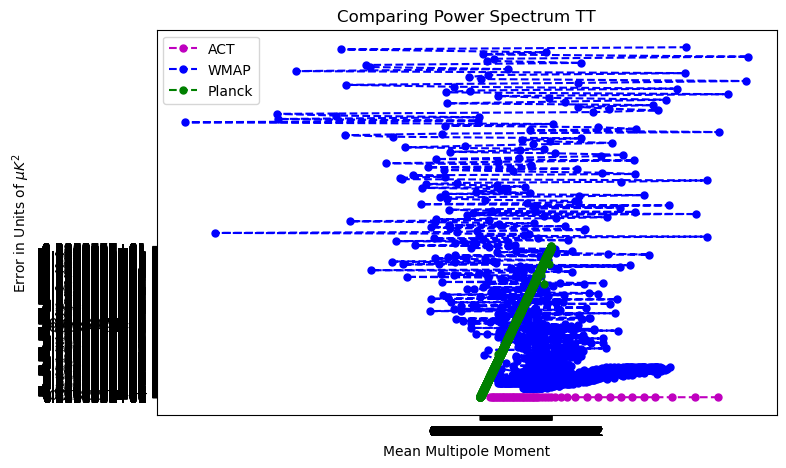

In [70]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.set_xlabel("Mean Multipole Moment")
ax.set_ylabel(r"Error in Units of $\mu K^2$")
ax.set_title("Comparing Power Spectrum TT")

# will have to manually calculate errors and graph that (to be fixed), for now just graphing l vs power spectrum
# Plotting ACT Data
ax.plot(act_tt_data[0], act_tt_data[1],
        label = "ACT",
        color = "m",
        marker = "o",
        linestyle = "--",
        markersize = 5);

# Plotting WMAP Data
ax.plot(wmap_tt_data[1], wmap_tt_data[2],
        label = "WMAP",
        color = "b",
        marker = "o",
        linestyle = "--",
        markersize = 5);

# Plotting Planck Data
ax.plot(planck_tt_data[1], planck_tt_data[2],
        label = "Planck",
        color = "g",
        marker = "o",
        linestyle = "--",
        markersize = 5);

ax.legend(loc = 0)